In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.neural_network import MLPRegressor

In [5]:
# Importing data
data= pd.read_excel(r"../ML/Book1.xlsx")
X=data[['Temperature (°C)','Anode support thickness (mm)','Anode support porosity (%)','Electrolyte thickness (μm)','CFL thickness (μm)','Current density (A cm-2)']]
y=data['Voltage (V)']
# Standardization
sc= StandardScaler()
X_std= sc.fit_transform(X)
X_std=pd.DataFrame(X_std,columns=X.columns)

<Figure size 1000x1000 with 0 Axes>

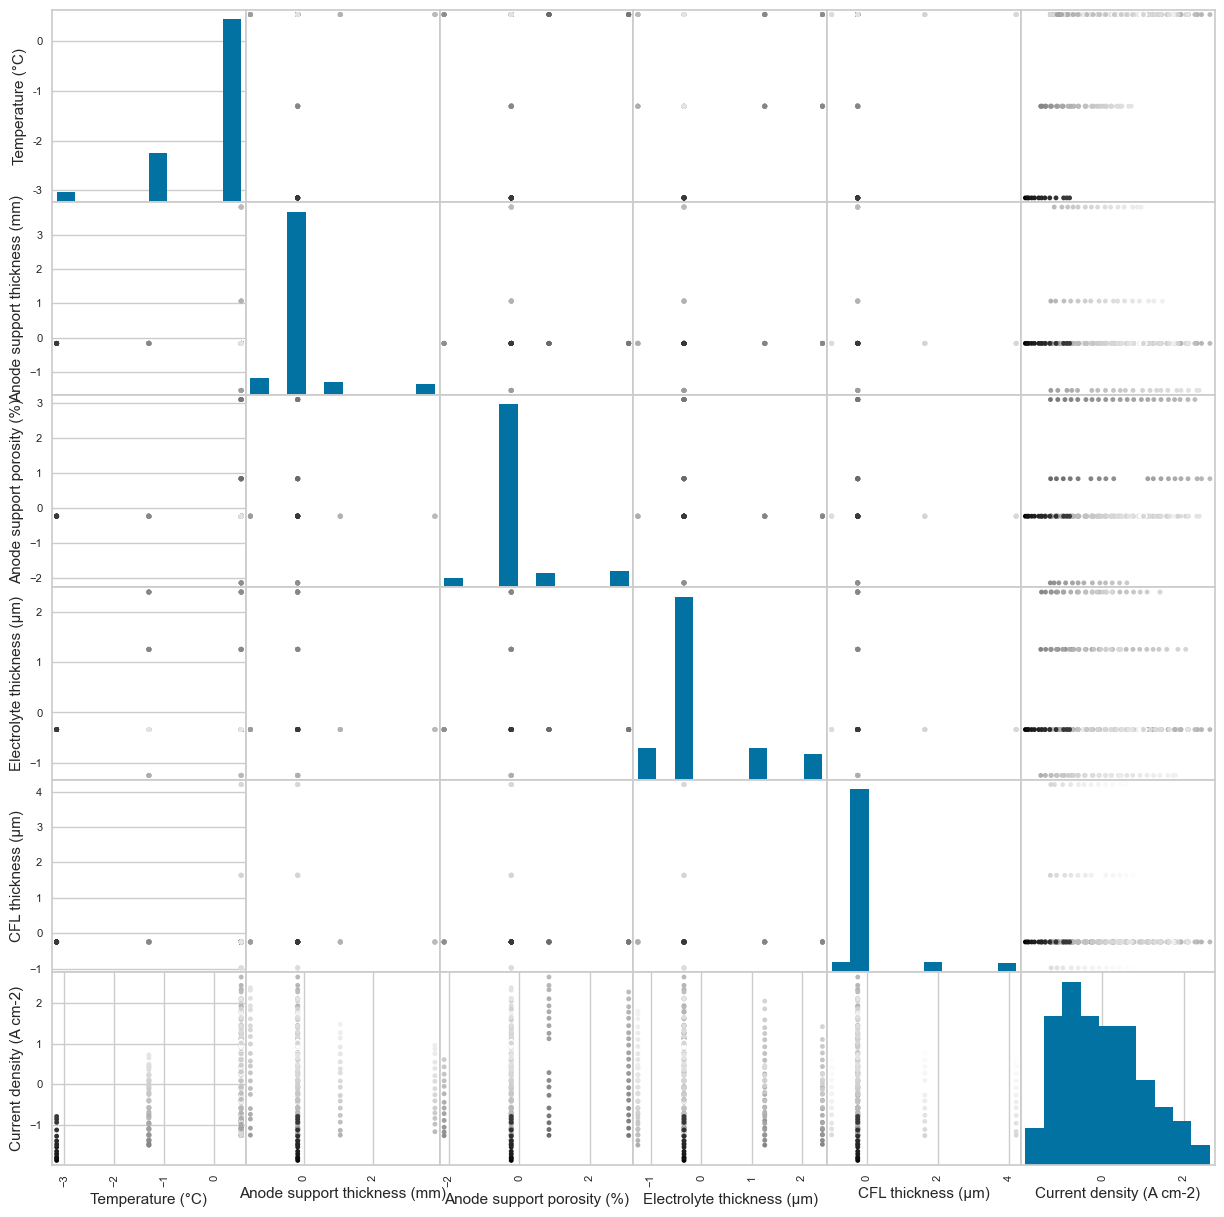

In [6]:
# Plotting standard features distribution
plt.figure(figsize=(10,10))
plot=pd.plotting.scatter_matrix(pd.DataFrame(X_std),c=y,figsize=(15,15),alpha=1,grid='false')


In [7]:
# Features decomposition
pca=PCA(n_components=6)
pca.fit(X_std)
X_decomposited= pca.fit_transform(X_std)
X_decomposited=pd.DataFrame(X_decomposited, columns=['component0','component1','component2','component3','component4','component5'])


<Figure size 1000x1000 with 0 Axes>

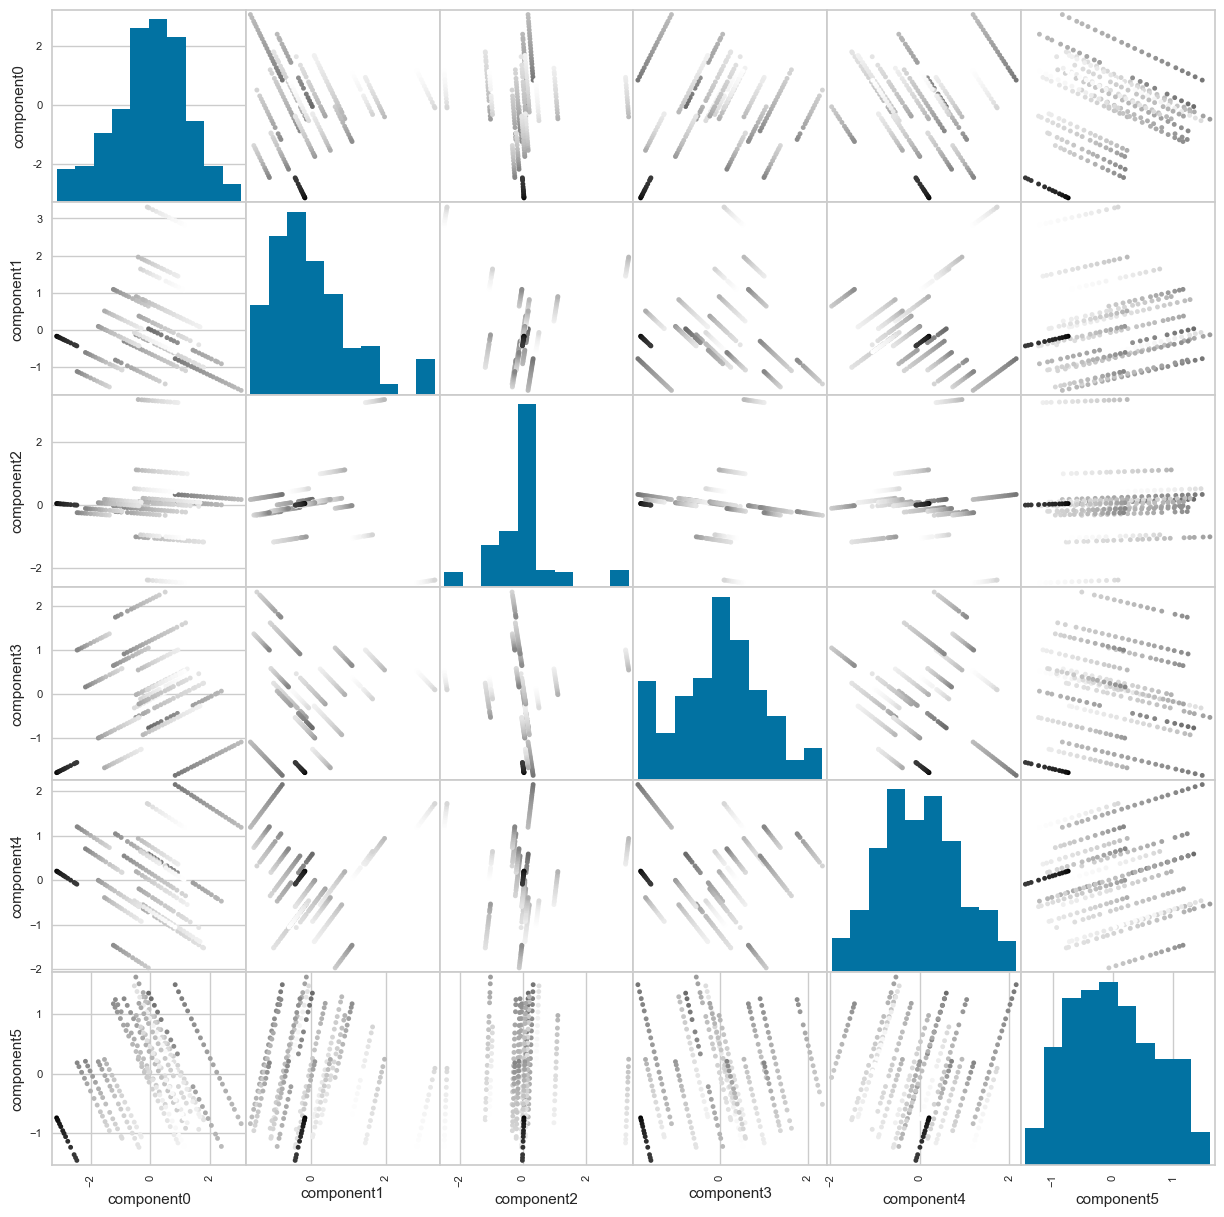

In [8]:
# Ploting decoposed features
plt.figure(figsize=(10,10))
plot1=pd.plotting.scatter_matrix(pd.DataFrame(X_decomposited),c=y,figsize=(15,15),alpha=1,grid='false')


<Axes: >

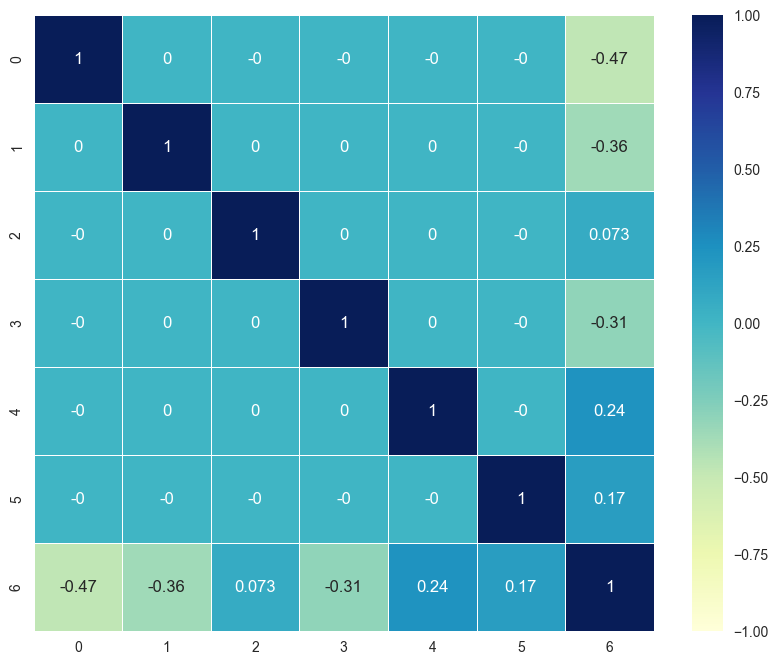

In [9]:
# Plotting Pearson corelation heatmap
data=pd.concat((pd.DataFrame(X_decomposited),pd.DataFrame(y)), axis=1)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(np.round(np.array(pd.DataFrame(data.corr())),decimals=4), vmin=-1, vmax=1,annot=True, linewidths=.5, cmap="YlGnBu")


In [10]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X_decomposited,y,test_size=0.2,random_state=10)


LR train score: 0.5726730269098063
LR test score: 0.31085287736524747
r2_score: 0.31085287736524747
mean_squared_error: 0.05740249636147966
mean_absolute_error: 0.18704908019079358


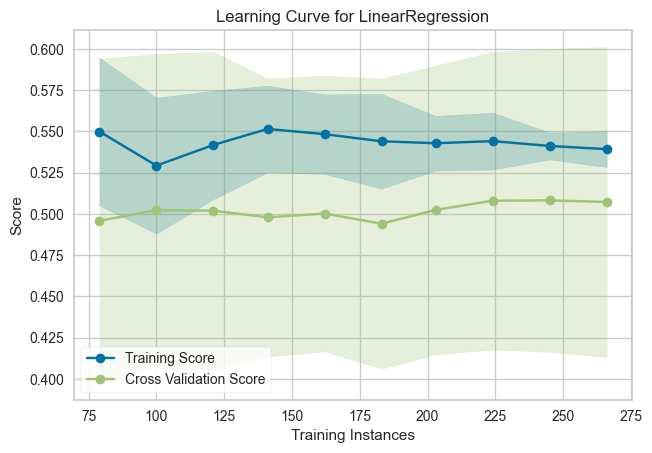

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


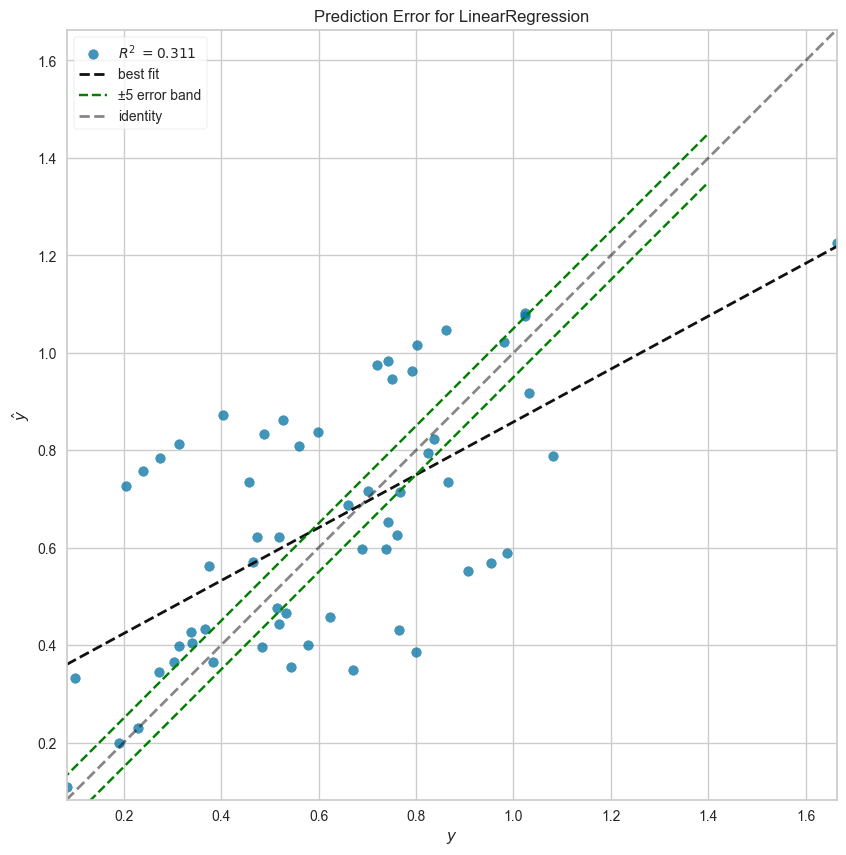

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [11]:
# Building Linear Regressor
lr= LinearRegression()
lr.fit(X_train,y_train)
print('LR train score:' ,lr.score(X_train,y_train))
print('LR test score:' ,lr.score(X_test,y_test))
y_pred= lr.predict(X_test)
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting Learning curve for linear regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = lr
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()

# Plotting prediction error for linear regressor
model = lr
plt.figure(figsize=(10,10))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b= np.arange(0,1.5,0.1)
a= b + 0.05
c= b - 0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()

Fitting 10 folds for each of 19 candidates, totalling 190 fits
GSCV best score is: 0.9818696435706462
GSCV best param is: {'n_neighbors': 1}
KNN train score: 1.0
KNN test score: 0.9907432810397555
r2_score: 0.9907432810397555
mean_squared_error: 0.0007710382282424433
mean_absolute_error: 0.014550915247143336


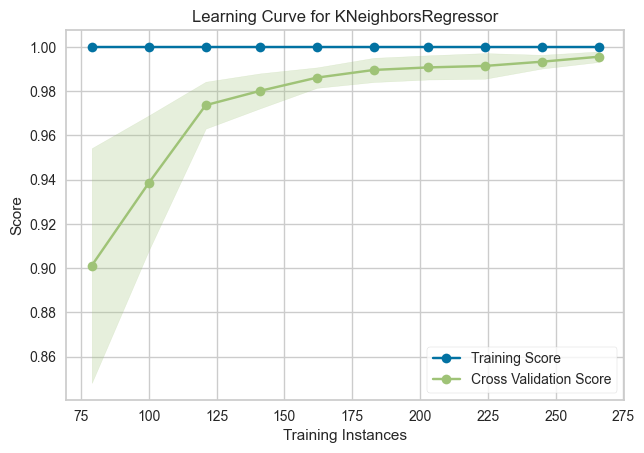

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


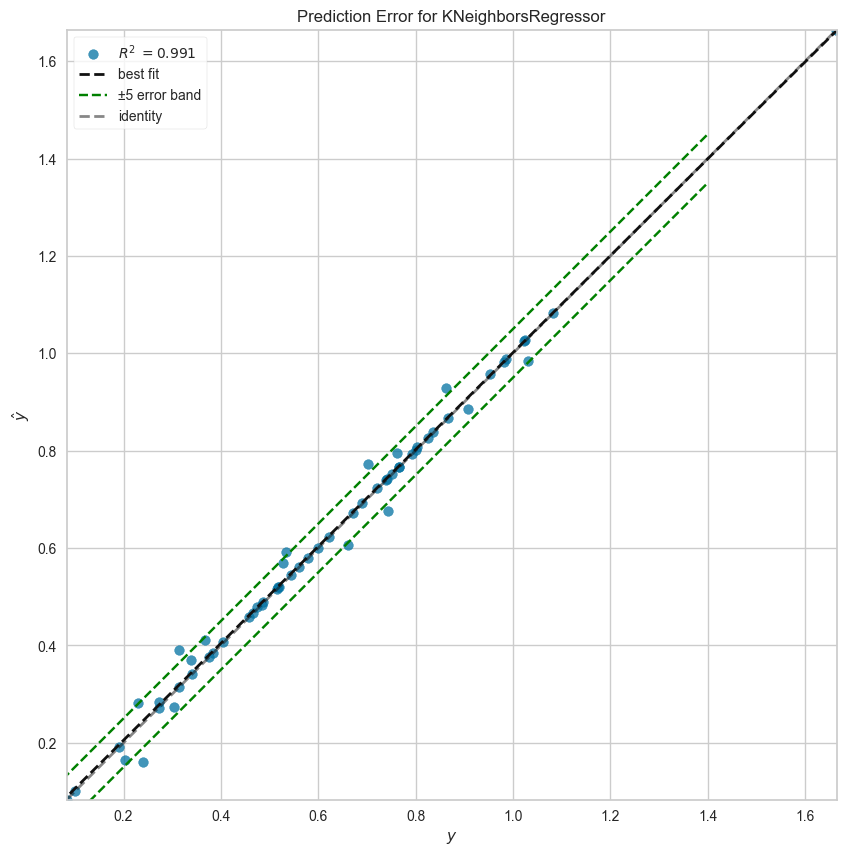

<Axes: title={'center': 'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [12]:
# Building KNN regressor

knn= KNeighborsRegressor(weights='distance',n_neighbors=1)
cv= ShuffleSplit(n_splits=10,random_state=10)
gscv=GridSearchCV(knn,param_grid={'n_neighbors': range(1,20)}, cv=cv, n_jobs=-1, verbose=5)
gscv.fit(X_train,y_train)
print ( 'GSCV best score is:' , gscv.best_score_)
print ( 'GSCV best param is:' , gscv.best_params_)

knn2= KNeighborsRegressor(weights='distance',n_neighbors=2)
knn2.fit(X_train,y_train)
print('KNN train score:' ,knn2.score(X_train,y_train))
print('KNN test score:' ,knn2.score(X_test,y_test))
y_pred= knn2.predict(X_test)
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting learning curve for KNN regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = knn2
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()

# Plotting prediction error for KNN regressor
model = knn2
plt.figure(figsize=(10,10))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b=np.arange(0,1.5,0.1)
a=b+0.05
c=b-0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()

Fitting 10 folds for each of 19 candidates, totalling 190 fits
GSCV best score is: 0.8746409224966556
GSCV best param is: {'max_depth': np.int64(12)}
GSCV train score is: 0.998583816383576
GSCV test score is: 0.9592786630364459
r2_score: 0.9592786630364459
mean_squared_error: 0.0033918829813120717
mean_absolute_error: 0.04606315671142856


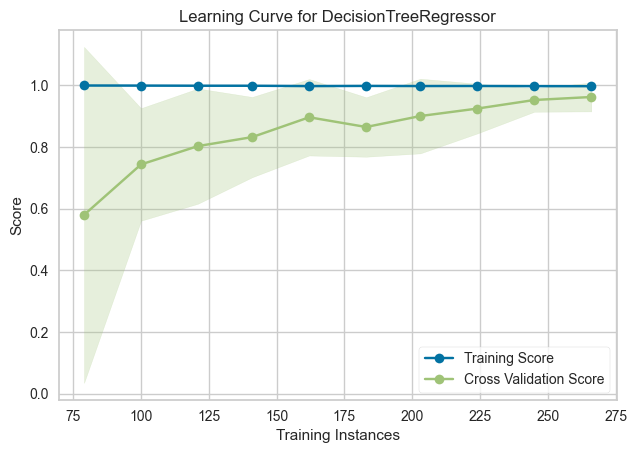

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


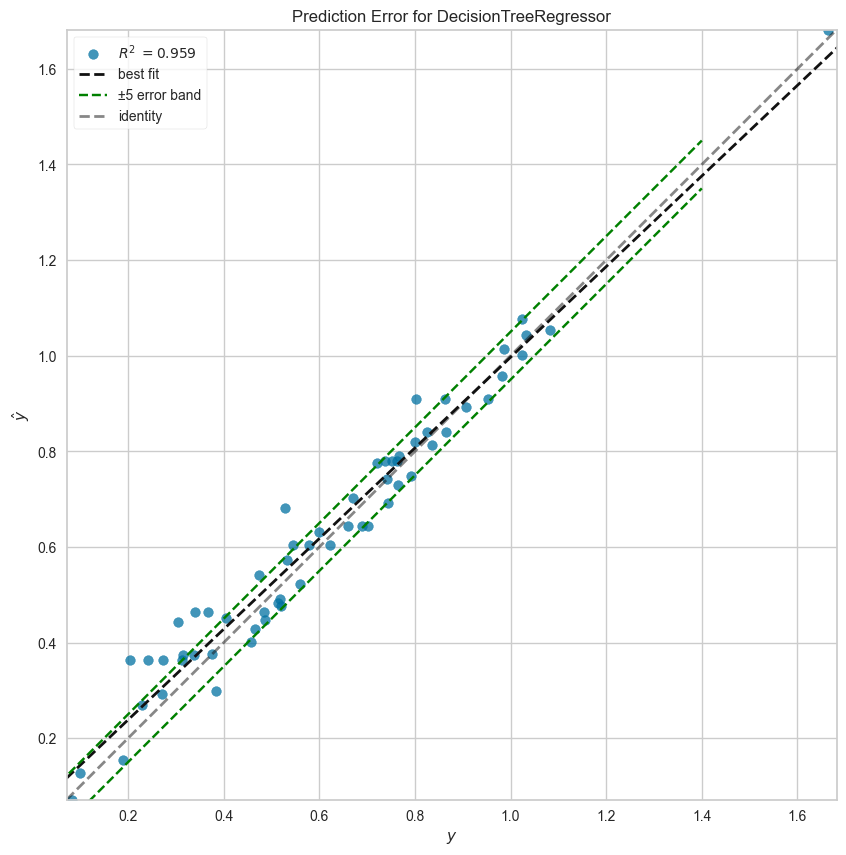

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
# Building decision tree regressor
dr= DecisionTreeRegressor(random_state=0)
gscv= GridSearchCV(dr, cv=cv, n_jobs=-1, param_grid= {'max_depth': np.arange(1,20,1)}, verbose=5)
gscv.fit(X_train,y_train)
print ( 'GSCV best score is:' , gscv.best_score_)
print ( 'GSCV best param is:' , gscv.best_params_)
dr10= DecisionTreeRegressor(random_state=0, max_depth=10)
dr10.fit(X_train,y_train)
y_pred=dr10.predict(X_test)
print ( 'GSCV train score is:' , dr10.score(X_train,y_train))
print ( 'GSCV test score is:' , dr10.score(X_test,y_test))
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting learning curve for decision tree regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = dr10
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()

# Plotting prediction error for decision tree regressor
plt.figure(figsize=(10,10))
model = dr10
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b=np.arange(0,1.5,0.1)
a=b+0.05
c=b-0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()


Fitting 10 folds for each of 124 candidates, totalling 1240 fits
GSCV best score is: 0.932035526411066
GSCV best param is: {'C': np.float64(3.7000000000000006), 'kernel': 'rbf'}
SVR train score is: 0.9612239151847302
SVR test score is: 0.9438060770773263
r2_score: 0.9438060770773263
mean_squared_error: 0.004680671732000613
mean_absolute_error: 0.060786634414510175


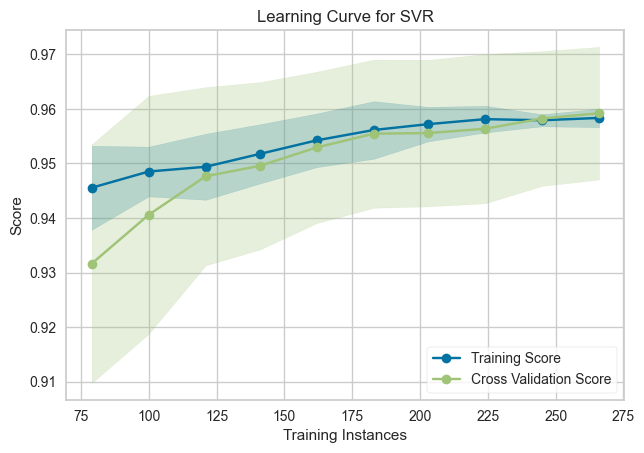

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


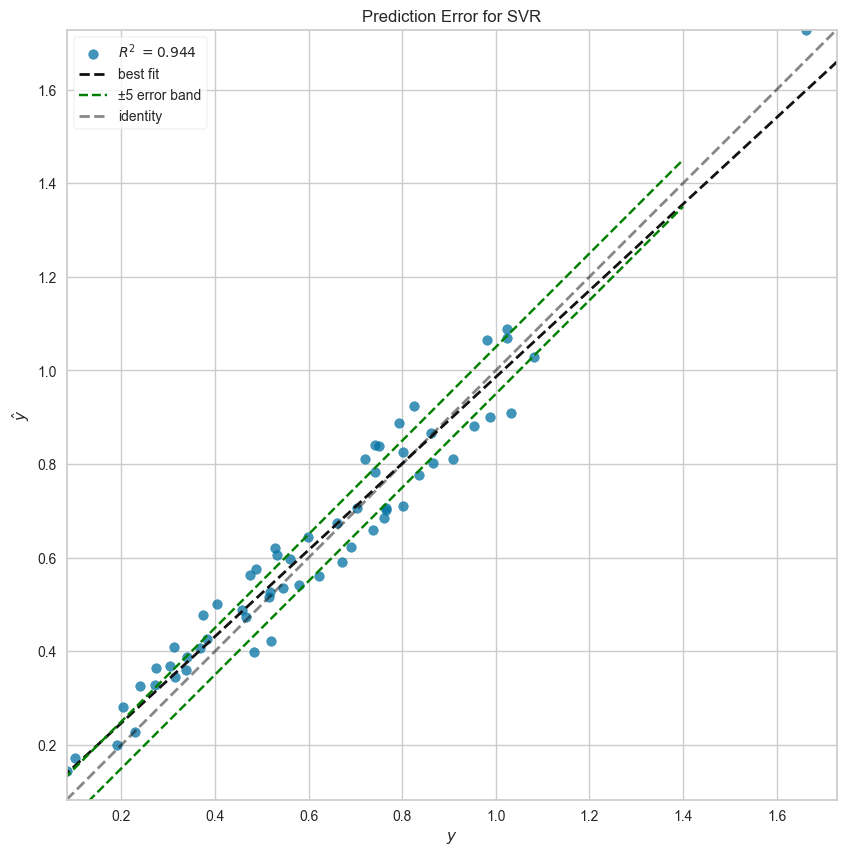

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [14]:
# Building Support vector regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
svr=SVR()
gscv= GridSearchCV(svr, cv=cv, n_jobs=-1, param_grid= {'kernel':['rbf','sigmoid','poly','linear'], 'C': np.arange(3.0,6.1,0.1)}, verbose=5)
gscv.fit(X_train,y_train)
print ( 'GSCV best score is:' , gscv.best_score_)
print ( 'GSCV best param is:' , gscv.best_params_)
svr=SVR(kernel='rbf', C=4.7)
svr.fit(X_train,y_train)
y_pred= svr.predict(X_test)
print ( 'SVR train score is:' , svr.score(X_train,y_train))
print ( 'SVR test score is:' , svr.score(X_test,y_test))
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting learning curve for Support vector regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = svr
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()

# Plotting prediction error for Support vector regressor
plt.figure(figsize=(10,10))
model = svr
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b=np.arange(0,1.5,0.1)
a=b+0.05
c=b-0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()

0.9930375539768194
0.9544056242394104
r2_score: 0.9544056242394104
mean_squared_error: 0.0037977826544424356
mean_absolute_error: 0.03757192632410876


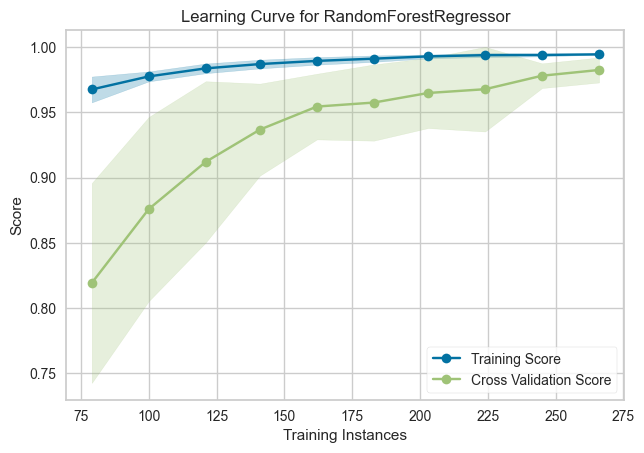

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


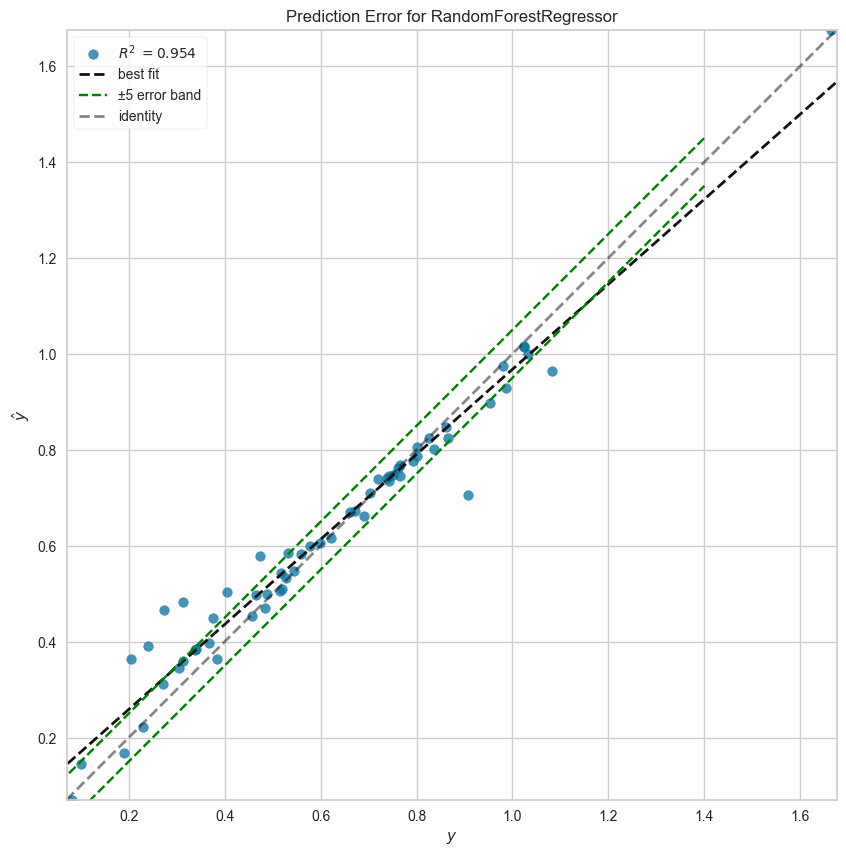

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [15]:
# Building Random forest regressor
rr= RandomForestRegressor(n_estimators=2000)
rr.fit(X_train,y_train)
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))
y_pred=rr.predict(X_test)
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting learning curve for random forest regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = rr
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()


# Plotting prediction error for random forest regressor
plt.figure(figsize=(10,10))
model = rr
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b=np.arange(0,1.5,0.1)
a=b+0.05
c=b-0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()

In [16]:
# Building gradient boosting regressor
gbr= GradientBoostingRegressor(n_estimators=2000)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))
y_pred=gbr.predict(X_test)
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting learning curve for gradient boosting regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = gbr
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()


# Plotting prediction error for gradient boosting regressor
plt.figure(figsize=(10,10))
model = gbr
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b=np.arange(0,1.5,0.1)
a=b+0.05
c=b-0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


0.9999999687811062
0.991629150319529
r2_score: 0.991629150319529
mean_squared_error: 0.0006972497635753749
mean_absolute_error: 0.012509017732112675


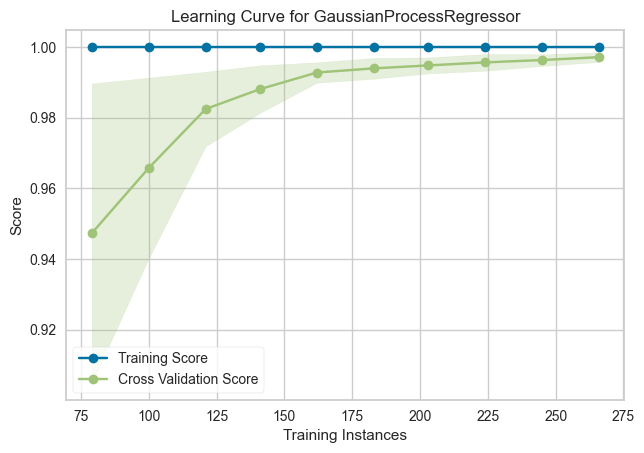

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


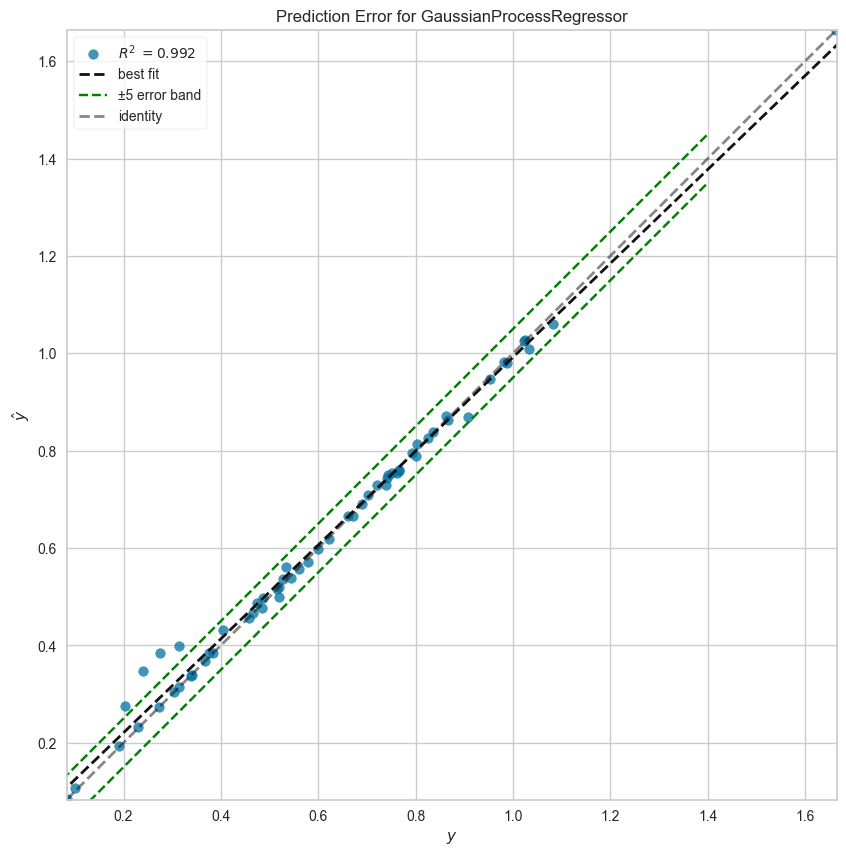

<Axes: title={'center': 'Prediction Error for GaussianProcessRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Building Gaussian process regressor
kernel = Matern(length_scale=0.2,nu=0.375) + WhiteKernel(noise_level=1e-10)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=1e-20)
gpr.fit(X_train,y_train)
print(gpr.score(X_train,y_train))
print(gpr.score(X_test,y_test))
y_pred=gpr.predict(X_test)
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting learning curve for gaussian process regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = gpr
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()

# Plotting prediction error for gaussian process regressor
plt.figure(figsize=(10,10))
model = gpr
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b=np.arange(0,1.5,0.1)
a=b+0.05
c=b-0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9972964084321237
0.9934579377654132
r2_score: 0.9934579377654132
mean_squared_error: 0.0005449209483480176
mean_absolute_error: 0.016838487067333718


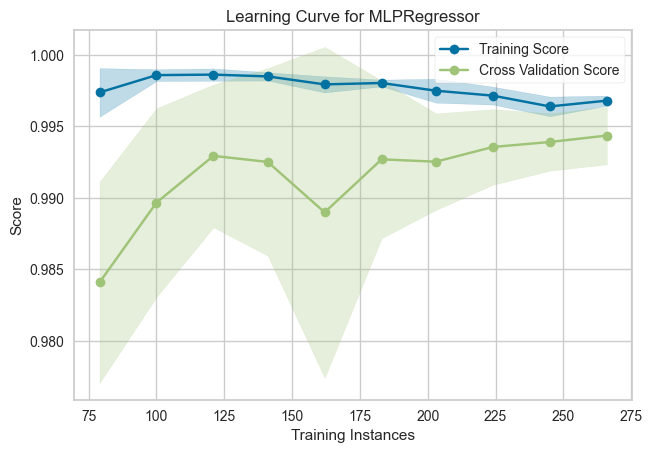

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


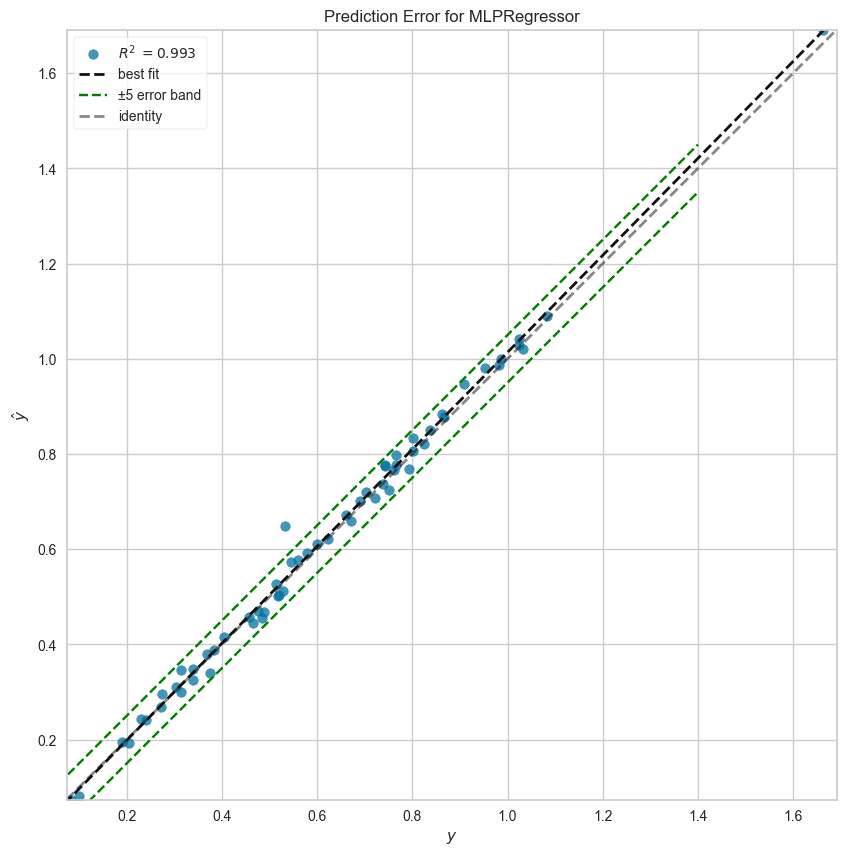

In [ ]:
# Building MLP regressor
nnr= MLPRegressor(hidden_layer_sizes=(300,300),activation='relu',random_state=123, solver='lbfgs',alpha=0.011, max_iter=100)
nnr.fit(X_train,y_train)
print(nnr.score(X_train,y_train))
print(nnr.score(X_test, y_test))
y_pred=nnr.predict(X_test)
print('r2_score:',r2_score(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))

# Plotting learning curve for MLP regressor
cv= ShuffleSplit(n_splits=10,random_state=10)
sizes = np.linspace(0.3, 1.0, 10)
model = nnr
plt.figure(figsize=(8,6))
visualizer = LearningCurve(model, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=-1, size=(720, 480))
visualizer.fit(X_decomposited,y)
visualizer.show()

# Plotting prediction error for MLP regressor
plt.figure(figsize=(10,10))
model = nnr
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
b=np.arange(0,1.5,0.1)
a=b+0.05
c=b-0.05
plt.plot(b,a,ls='--',color='green')
plt.plot(b,c,ls='--', color='green', label='±5 error band')
plt.legend(fontsize=24, loc='upper right')
visualizer.show()

# Building the best model to predict the Current-Voltage dependency
# The best model is MLP regressor with tuned hyperparameters
def predict(x):
    x= sc.transform(x)
    x= pca.transform(x)
    return(nnr.predict(x))


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names

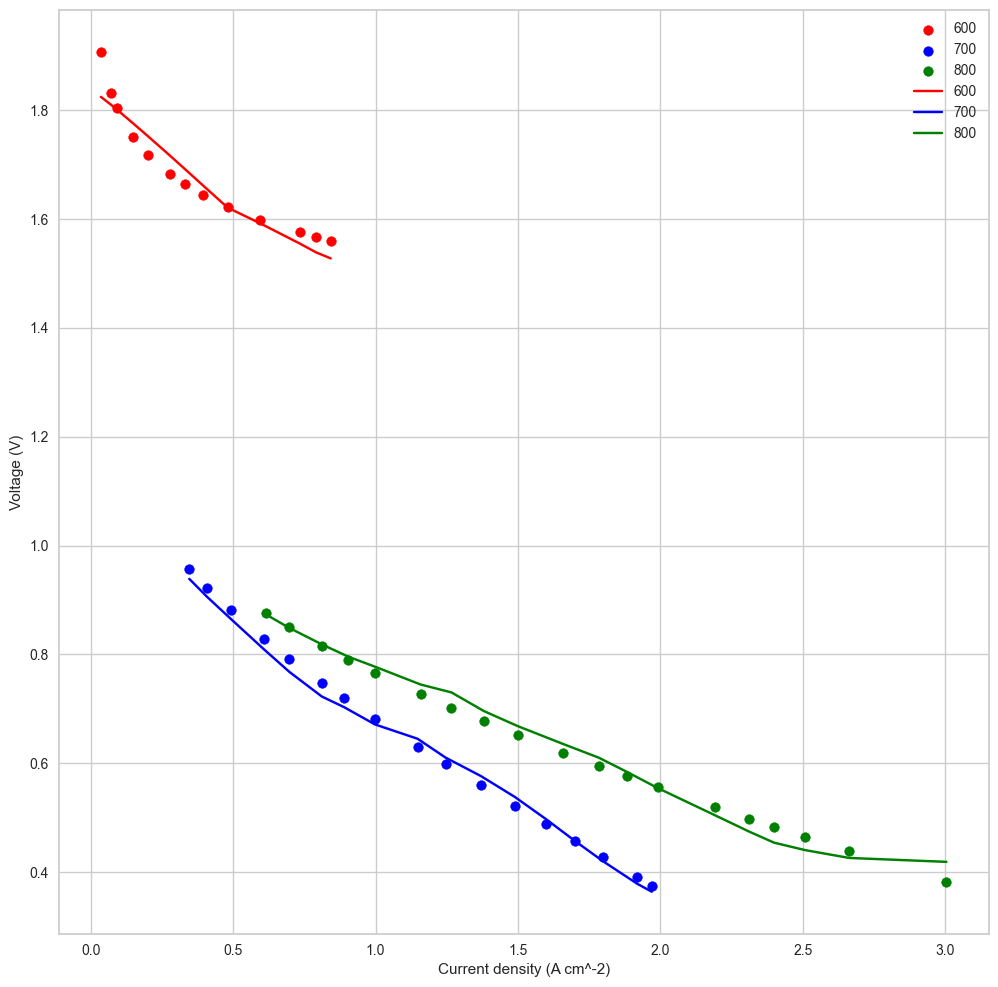

In [ ]:
# Plotting effect of operating temperature on current-voltage dependency
df = pd.read_excel(r"./Book1.xlsx")
data800 = df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
data700 = df[(df['Temperature (°C)'] == 700) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
data600 = df[(df['Temperature (°C)'] == 600) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]

plt.figure(figsize=(12,12))
plt.scatter(data600['Current density (A cm-2)'], data600['Voltage (V)'], c='red', label='600')
plt.scatter(data700['Current density (A cm-2)'], data700['Voltage (V)'], c='blue', label='700')
plt.scatter(data800['Current density (A cm-2)'], data800['Voltage (V)'], c='green', label='800')
plt.plot(data600['Current density (A cm-2)'], predict(data600.iloc[:,:6]), c='red', label='600')
plt.plot(data700['Current density (A cm-2)'], predict(data700.iloc[:,:6]), c='blue', label='700')
plt.plot(data800['Current density (A cm-2)'], predict(data800.iloc[:,:6]), c='green', label='800')
plt.ylabel('Voltage (V)')
plt.xlabel('Current density (A cm^-2)')
plt.legend()
plt.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names

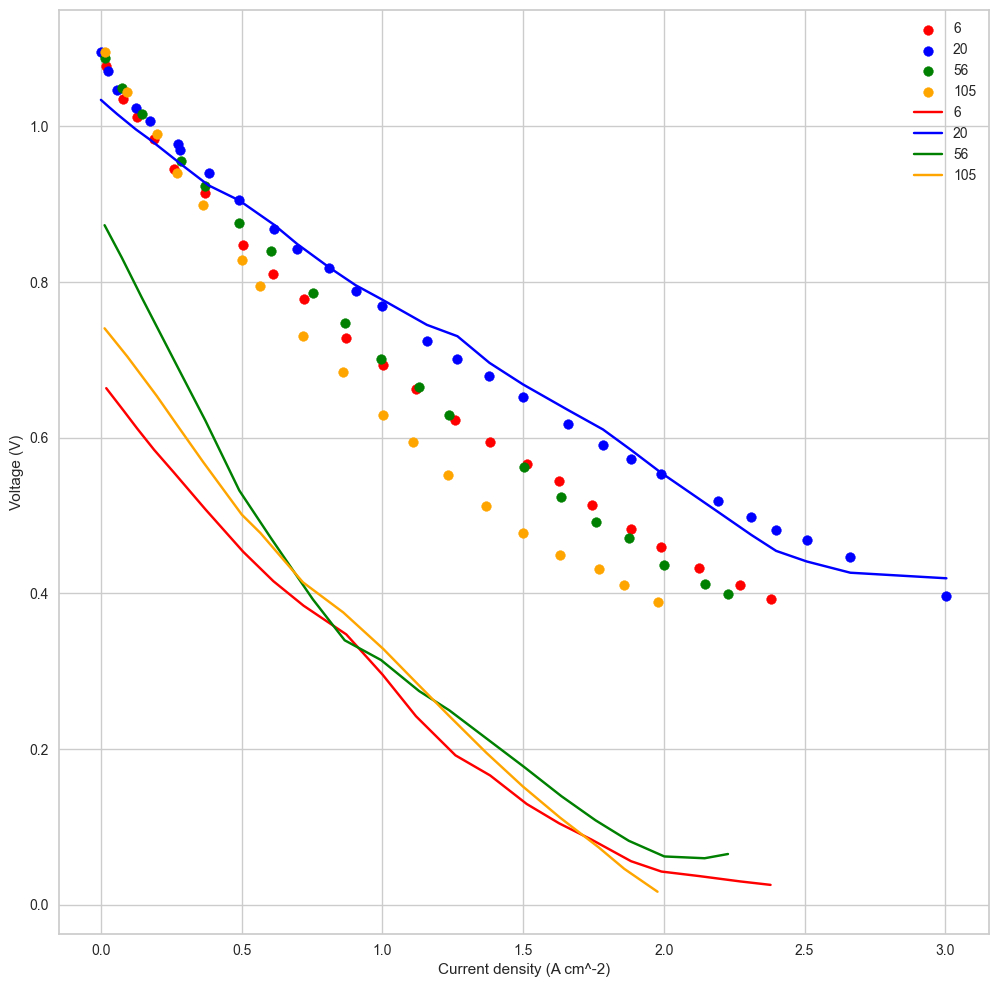

In [ ]:
# Plotting effect of CFL thickness on current-voltage dependency
df = pd.read_excel(r"./Book1.xlsx")
CFL6= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 6)]
CFL20= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
CFL56= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 56)]
CFL105= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 105)]
plt.figure(figsize=(12,12))
plt.scatter(CFL6['Current density (A cm-2)'], CFL6['Voltage (V)'], c='red', label='6')
plt.scatter(CFL20['Current density (A cm-2)'], CFL20['Voltage (V)'], c='blue', label='20')
plt.scatter(CFL56['Current density (A cm-2)'], CFL56['Voltage (V)'], c='green', label='56')
plt.scatter(CFL105['Current density (A cm-2)'], CFL105['Voltage (V)'], c='orange', label='105')
plt.plot(CFL6['Current density (A cm-2)'], predict(CFL6.iloc[:,:6]), c='red', label='6')
plt.plot(CFL20['Current density (A cm-2)'], predict(CFL20.iloc[:,:6]), c='blue', label='20')
plt.plot(CFL56['Current density (A cm-2)'], predict(CFL56.iloc[:,:6]), c='green', label='56')
plt.plot(CFL105['Current density (A cm-2)'], predict(CFL105.iloc[:,:6]), c='orange', label='105')
plt.ylabel('Voltage (V)')
plt.xlabel('Current density (A cm^-2)')
plt.legend()
plt.show()


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names

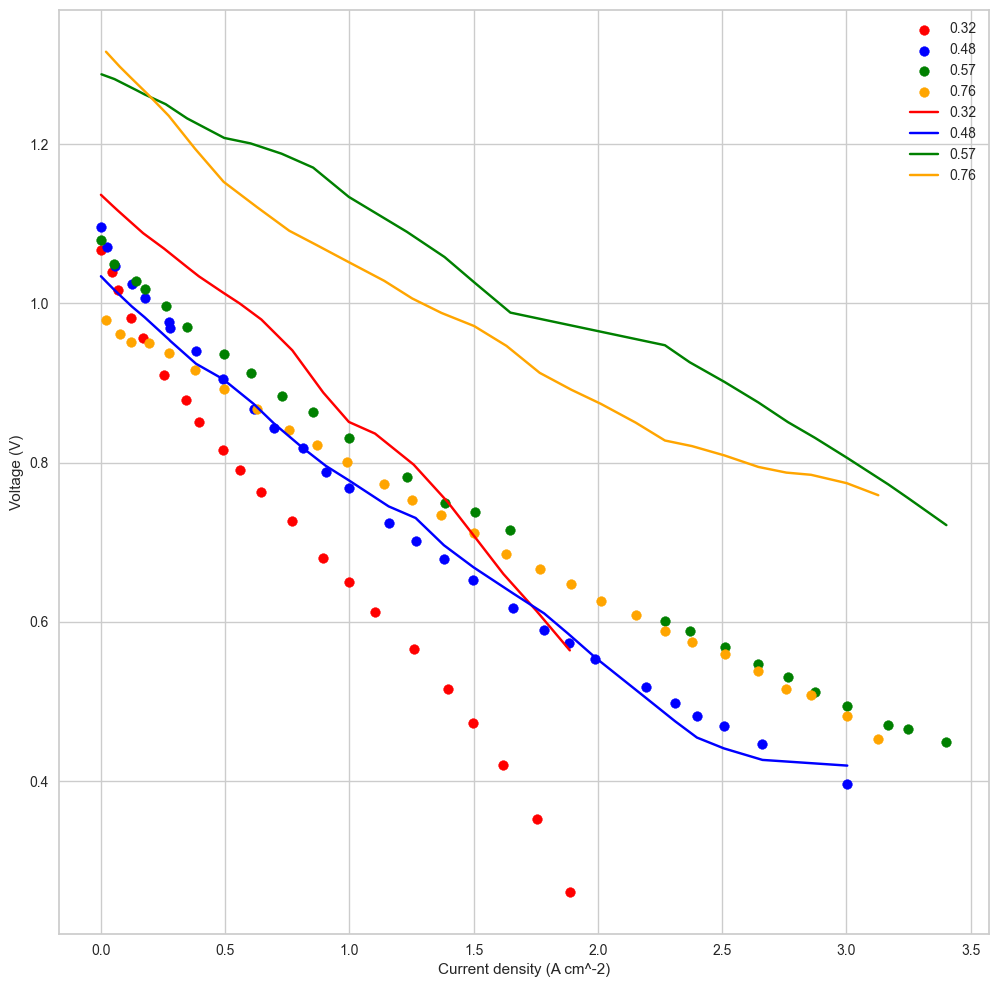

In [ ]:
# Plotting effect of Porosity on current-voltage dependency
Porosity32= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.32) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
Porosity48= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
Porosity57= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.57) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
Porosity76= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.76) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
plt.figure(figsize=(12,12))
plt.scatter(Porosity32['Current density (A cm-2)'], Porosity32['Voltage (V)'], c='red', label='0.32')
plt.scatter(Porosity48['Current density (A cm-2)'], Porosity48['Voltage (V)'], c='blue', label='0.48')
plt.scatter(Porosity57['Current density (A cm-2)'], Porosity57['Voltage (V)'], c='green', label='0.57')
plt.scatter(Porosity76['Current density (A cm-2)'], Porosity76['Voltage (V)'], c='orange', label='0.76')
plt.plot(Porosity32['Current density (A cm-2)'], predict(Porosity32.iloc[:,:6]), c='red', label='0.32')
plt.plot(Porosity48['Current density (A cm-2)'], predict(Porosity48.iloc[:,:6]), c='blue', label='0.48')
plt.plot(Porosity57['Current density (A cm-2)'], predict(Porosity57.iloc[:,:6]), c='green', label='0.57')
plt.plot(Porosity76['Current density (A cm-2)'], predict(Porosity76.iloc[:,:6]), c='orange', label='0.76')
plt.ylabel('Voltage (V)')
plt.xlabel('Current density (A cm^-2)')
plt.legend()
plt.show()


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names

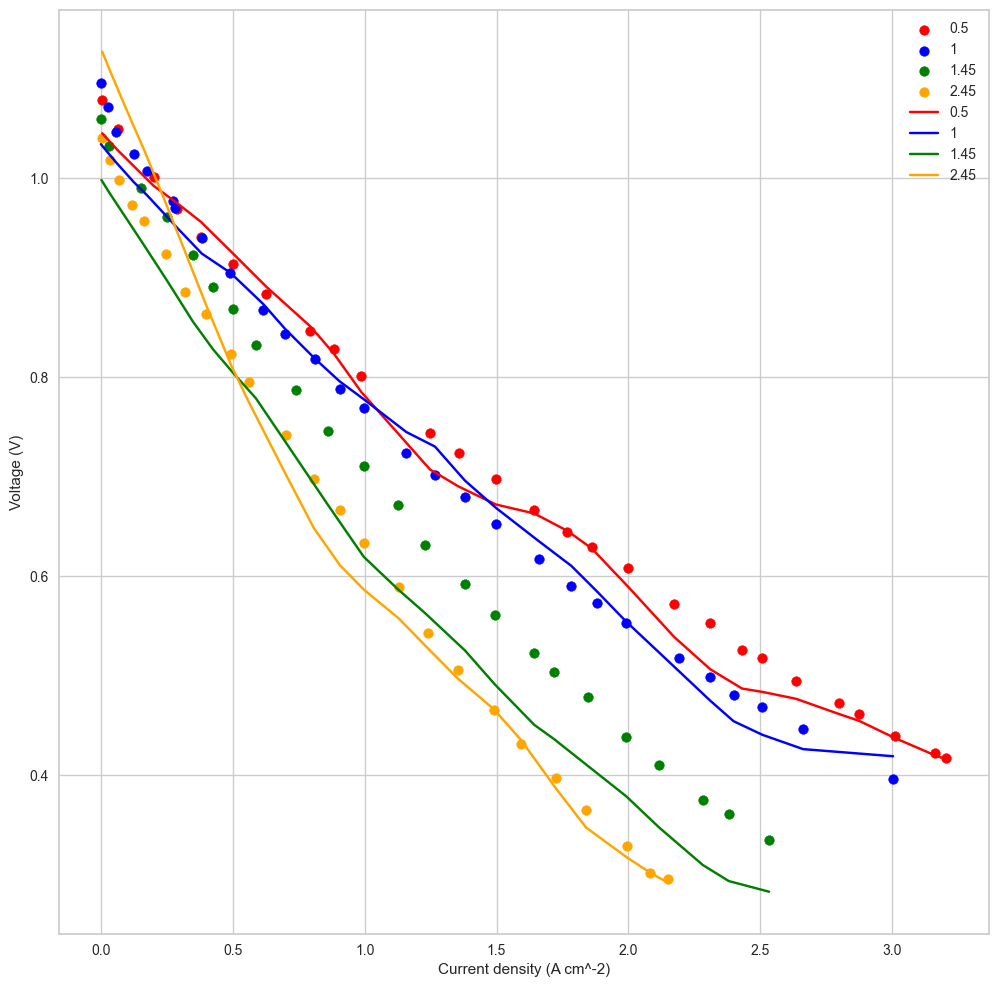

In [ ]:
# Plotting effect of anode support thickness on current-voltage dependency
Thickness05= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 0.5) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
Thickness1= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
Thickness145= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1.45) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
Thickness245= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 2.45) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
plt.figure(figsize=(12,12))
plt.scatter(Thickness05['Current density (A cm-2)'], Thickness05['Voltage (V)'], c='red', label='0.5')
plt.scatter(Thickness1['Current density (A cm-2)'], Thickness1['Voltage (V)'], c='blue', label='1')
plt.scatter(Thickness145['Current density (A cm-2)'], Thickness145['Voltage (V)'], c='green', label='1.45')
plt.scatter(Thickness245['Current density (A cm-2)'], Thickness245['Voltage (V)'], c='orange', label='2.45')
plt.plot(Thickness05['Current density (A cm-2)'], predict(Thickness05.iloc[:,:6]), c='red', label='0.5')
plt.plot(Thickness1['Current density (A cm-2)'], predict(Thickness1.iloc[:,:6]), c='blue', label='1')
plt.plot(Thickness145['Current density (A cm-2)'], predict(Thickness145.iloc[:,:6]), c='green', label='1.45')
plt.plot(Thickness245['Current density (A cm-2)'], predict(Thickness245.iloc[:,:6]), c='orange', label='2.45')
plt.ylabel('Voltage (V)')
plt.xlabel('Current density (A cm^-2)')
plt.legend()
plt.show()


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names

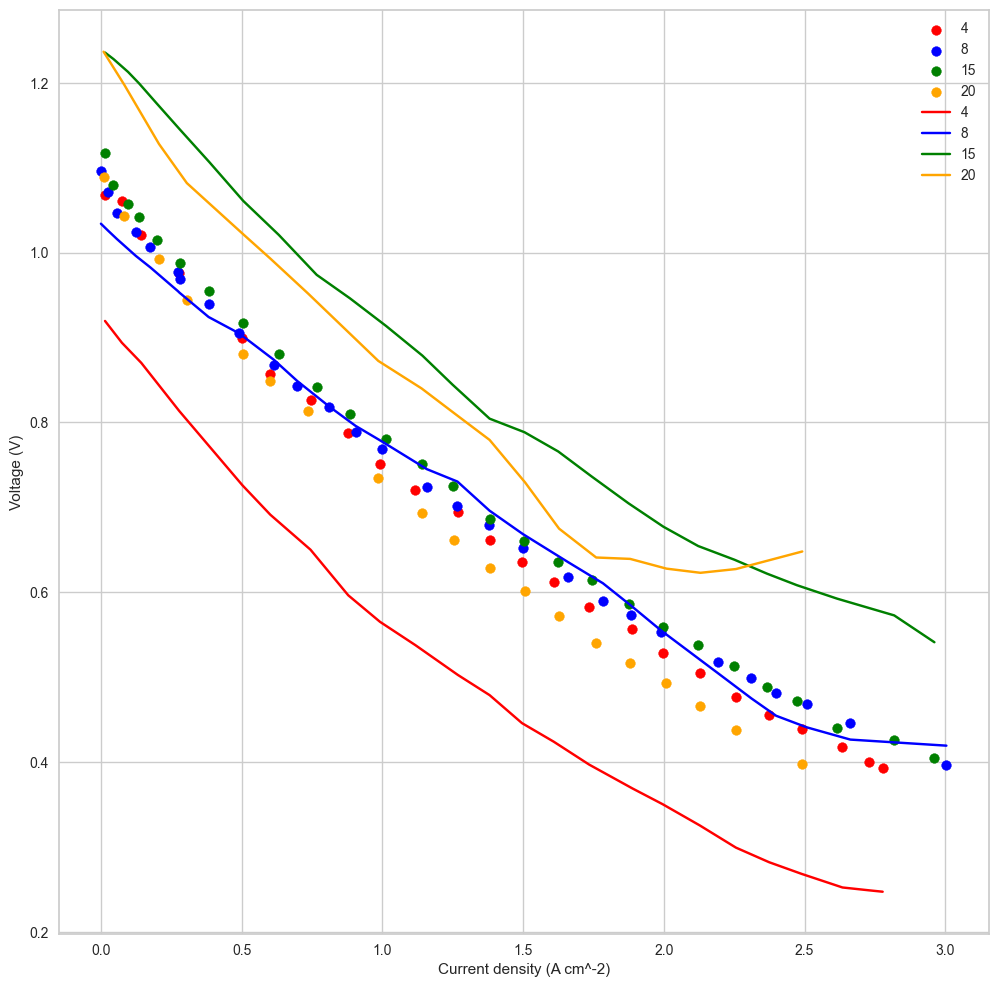

In [ ]:
# Plotting effect of electrolyte thickness on current-voltage dependency
ET4= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 4) & (df['CFL thickness (μm)'] == 20)]
ET8= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 8) & (df['CFL thickness (μm)'] == 20)]
ET15=df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 15) & (df['CFL thickness (μm)'] == 20)]
ET20= df[(df['Temperature (°C)'] == 800) & (df['Anode support thickness (mm)'] == 1) & (df['Anode support porosity (%)'] == 0.48) & (df['Electrolyte thickness (μm)'] == 20) & (df['CFL thickness (μm)'] == 20)]
plt.figure(figsize=(12,12))
plt.scatter(ET4['Current density (A cm-2)'], ET4['Voltage (V)'], c='red', label='4')
plt.scatter(ET8['Current density (A cm-2)'], ET8['Voltage (V)'], c='blue', label='8')
plt.scatter(ET15['Current density (A cm-2)'], ET15['Voltage (V)'], c='green', label='15')
plt.scatter(ET20['Current density (A cm-2)'], ET20['Voltage (V)'], c='orange', label='20')
plt.plot(ET4['Current density (A cm-2)'], predict(ET4.iloc[:,:6]), c='red', label='4')
plt.plot(ET8['Current density (A cm-2)'], predict(ET8.iloc[:,:6]), c='blue', label='8')
plt.plot(ET15['Current density (A cm-2)'], predict(ET15.iloc[:,:6]), c='green', label='15')
plt.plot(ET20['Current density (A cm-2)'], predict(ET20.iloc[:,:6]), c='orange', label='20')
plt.ylabel('Voltage (V)')
plt.xlabel('Current density (A cm^-2)')
plt.legend()
plt.show()